## NJSLA Spring 25 Science Analysis 

Analysis of the Science results of the Spring 25 NJSLA

In [1]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# importing dataset
df_sci = pd.read_csv(r"S:\ASSESSMENTS\NJSLA 2025\NJSLA 2025 Science Summative_Record_File_Spring.csv")

In [3]:
#filtering for valid test attempts
df_sci = df_sci[df_sci['TestStatus']=='Attempt']

In [4]:
# filtering to return ELA TestCodes
df_sci['TestCode'].unique()

array(['SC11', 'SC08', 'SC05'], dtype=object)

In [5]:
subject = 'SCI'

In [6]:
df_sci.shape

(1136, 206)

In [7]:
# min and max scale scores by test performance level
df_sci.groupby('TestPerformanceLevel')['TestScaleScore'].agg(['min','max'])

,min,max
TestPerformanceLevel,,
1.0,100.0,152.0
2.0,150.0,198.0
3.0,200.0,245.0
4.0,231.0,300.0


In [8]:
# function for proficiency
def proficient (row):
    if row['TestScaleScore'] >= 200:
        return 1
    elif row['TestScaleScore'] < 200:
        return 0

df_sci['proficient'] = df_sci.apply(proficient, axis = 1)

### Overall Proficiency

In [9]:
# Test performance level metrics
overall_performance_levels = df_sci['TestPerformanceLevel'].value_counts(normalize = True)
overall_performance_levels = overall_performance_levels.reset_index()
overall_performance_levels = overall_performance_levels.sort_values(by = 'TestPerformanceLevel').reset_index(drop = True)

#overall proficiency
overall_proficiency = pd.DataFrame({'Outcome':'Proficient','Proficiency %':df_sci['proficient'].mean()}, index = [0])

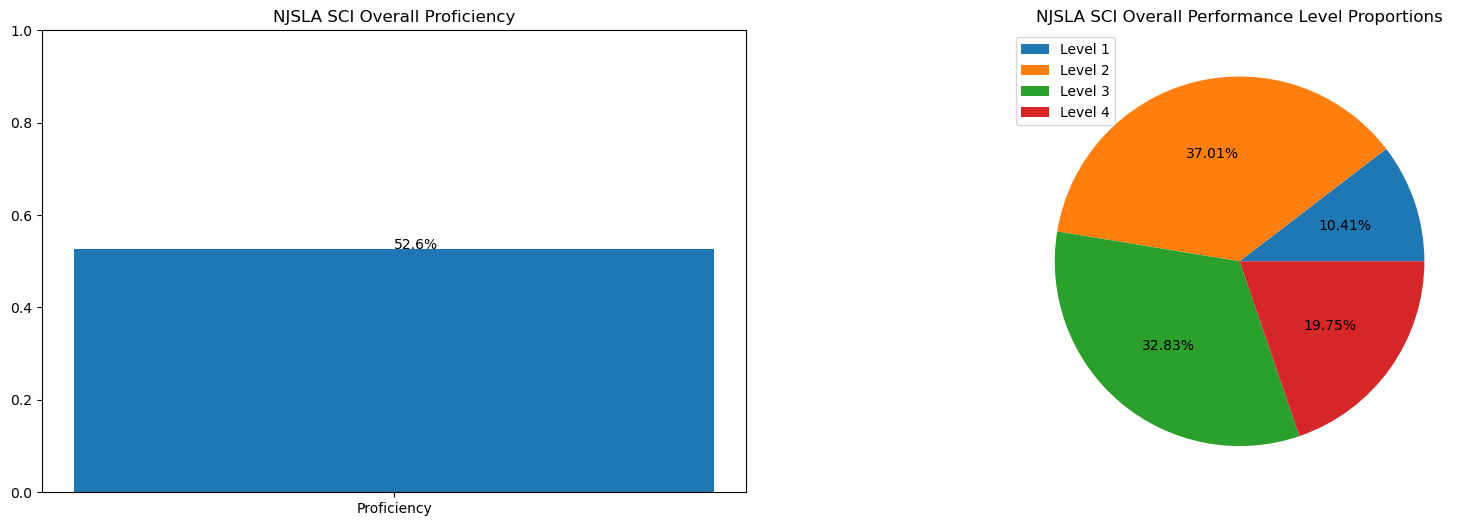

In [10]:
# plotting data
fig,ax = plt.subplots(nrows = 1, ncols =2, figsize = (20,6))
ax[1].pie (x = 'proportion', data = overall_performance_levels, autopct = '%1.2f%%' )
ax[0].bar(x = 'Proficiency', height = 'Proficiency %' ,data = overall_proficiency)

#labeling
ax[0].set_title(f"NJSLA {subject} Overall Proficiency")
ax[1].set_title(f"NJSLA {subject} Overall Performance Level Proportions")
ax[1].legend(['Level 1','Level 2','Level 3','Level 4', 'Level 5'], loc = 'upper left')
ax[0].set_ylim(0,1)#--> setting y axis limit

for i,v in enumerate(overall_proficiency['Proficiency %']):
    ax[0].text(i,v,f"{v:.1%}")

plt.show()

### Proficiency Comparision **General Education** and **IEP** 

In [11]:
# proficiency excluding IEP
gen_ed_test_performance = df_sci[df_sci['StudentWithDisabilities']!= 'IEP']['TestPerformanceLevel'].value_counts(normalize = True)
gen_ed_test_performance = gen_ed_test_performance.reset_index()
gen_ed_test_performance = gen_ed_test_performance.sort_values(by = 'TestPerformanceLevel').reset_index(drop = True)

# proficiency excluding IEP
gen_ed_proficiency = pd.DataFrame({'Outcome':'Gen Ed Proficient',
                                   'Proficiency %':df_sci[df_sci['StudentWithDisabilities']!= 'IEP']['proficient'].mean()}, index = [0])


# proficiency exclusively IEP
iep_test_performance = df_sci[df_sci['StudentWithDisabilities']=='IEP']['TestPerformanceLevel'].value_counts(normalize = True)
iep_test_performance = iep_test_performance.reset_index()
iep_test_performance = iep_test_performance.sort_values(by = 'TestPerformanceLevel' ).reset_index()

# proficiency exclusively IEP
iep_proficiency = pd.DataFrame({'Outcome':'Gen Ed Proficient',
                                 'Proficiency %':df_sci[df_sci['StudentWithDisabilities']== 'IEP']['proficient'].mean()}, index = [0])


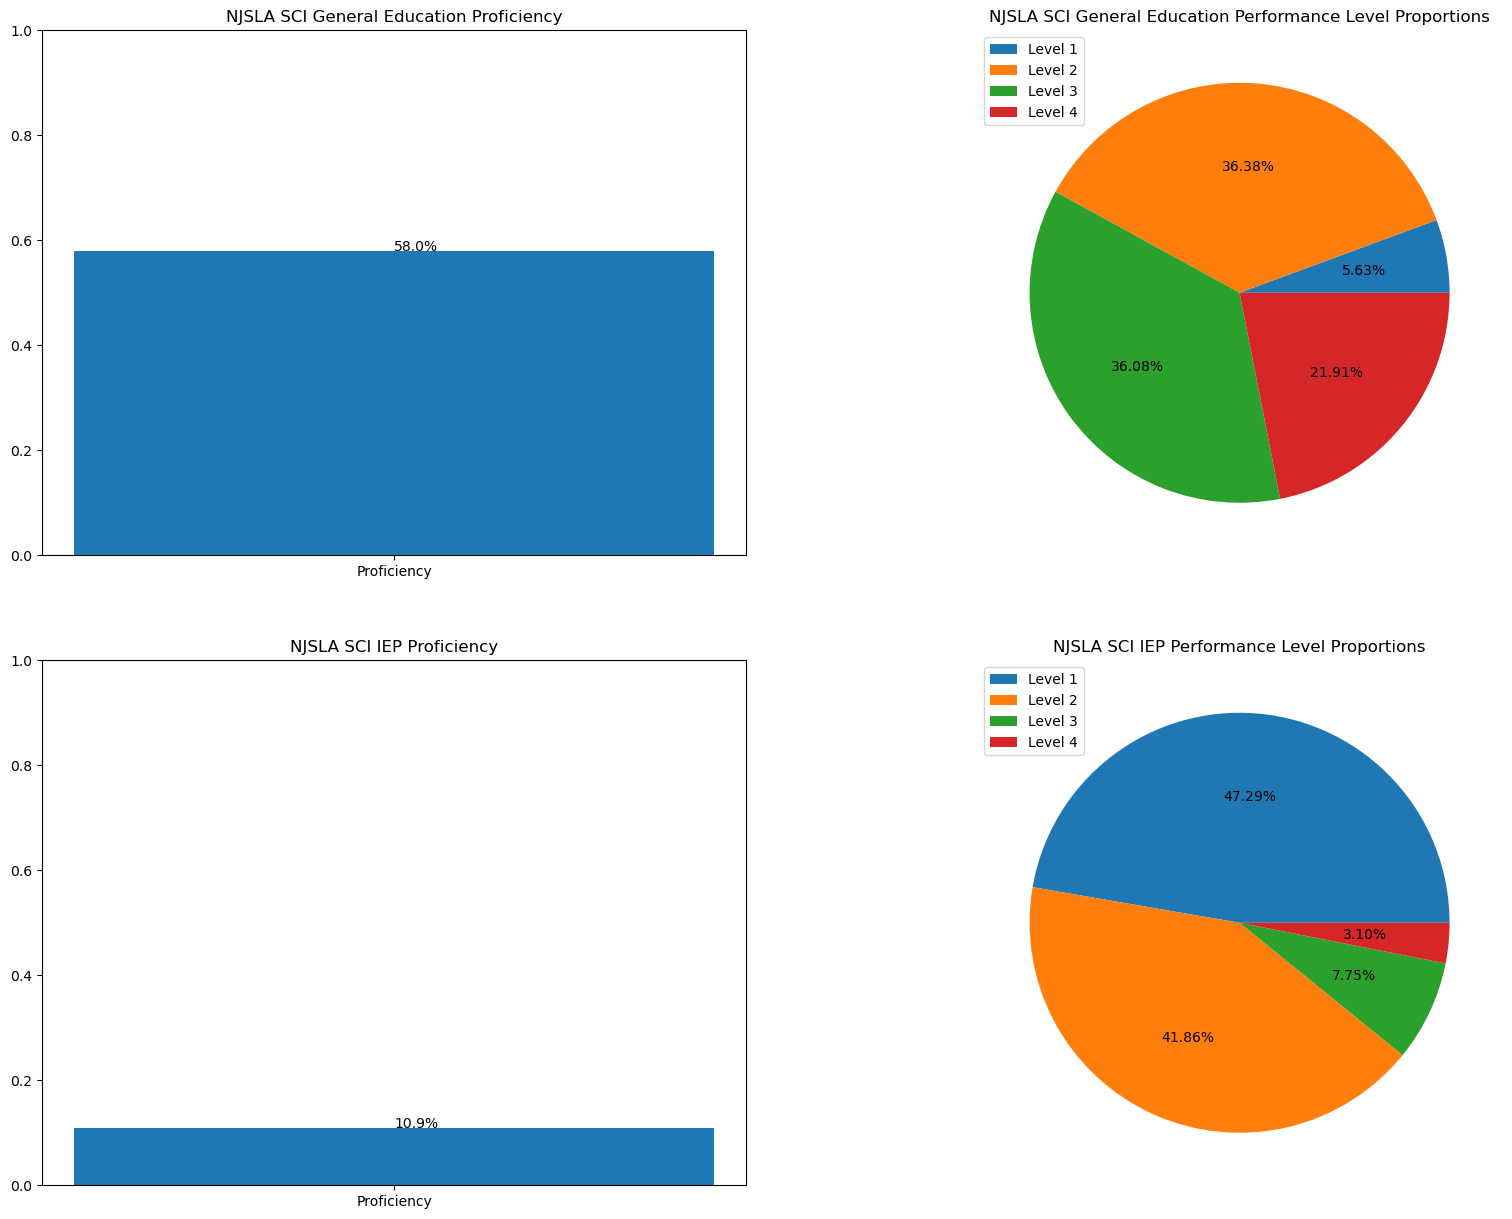

In [12]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

# plotting general education data
ax[0,1].pie (x = 'proportion', data = gen_ed_test_performance, autopct = '%1.2f%%' )
ax[0,0].bar(x = 'Proficiency', height = 'Proficiency %' ,data = gen_ed_proficiency)


# labeling
ax[0,0].set_title(f"NJSLA {subject} General Education Proficiency")
ax[0,1].set_title(f"NJSLA {subject} General Education Performance Level Proportions")

ax[0,0].set_ylim(0,1)
for i,v in enumerate(gen_ed_proficiency['Proficiency %']):
    ax[0,0].text(i,v,f"{v:.1%}")

ax[0,1].legend(['Level 1','Level 2','Level 3','Level 4', 'Level 5'], loc = 'upper left')


# plotting IEP data
ax[1,1].pie (x = 'proportion', data = iep_test_performance, autopct = '%1.2f%%' )
ax[1,0].bar(x = 'Proficiency', height = 'Proficiency %' ,data = iep_proficiency)


# labeling
ax[1,0].set_title(f"NJSLA {subject} IEP Proficiency")
ax[1,1].set_title(f"NJSLA {subject} IEP Performance Level Proportions")

ax[1,0].set_ylim(0,1)
for i,v in enumerate(iep_proficiency['Proficiency %']):
    ax[1,0].text(i,v,f"{v:.1%}")

ax[1,1].legend(['Level 1','Level 2','Level 3','Level 4', 'Level 5'], loc = 'upper left')


plt.show()


### Proficiency by Race

In [13]:
# function to create race column
def race (row):
    if row['TwoOrMoreRaces'] == 'Y':
        return 'Multi'
    elif row['HispanicOrLatinoEthnicity'] == 'Y':
        return 'Hispanic'
    elif row['AmericanIndianOrAlaskaNative '] == 'Y':
        return 'American Indian Or Alaska Native'
    elif row['Asian'] == 'Y':
        return 'Asian'
    elif row['BlackOrAfricanAmerican'] == 'Y':
        return 'Black'
    elif row['NativeHawaiianOrOtherPacificIslander'] == 'Y':
        return 'Native Hawaiian Or Other Pacific Islander'
    elif row['White'] == 'Y':
        return 'White'
        
df_sci['Race'] = df_sci.apply(race, axis = 1)

In [14]:
race = df_sci['Race'].value_counts().reset_index()
race

,Race,count
0,White,642
1,Asian,262
2,Multi,114
3,Hispanic,104
4,Black,14


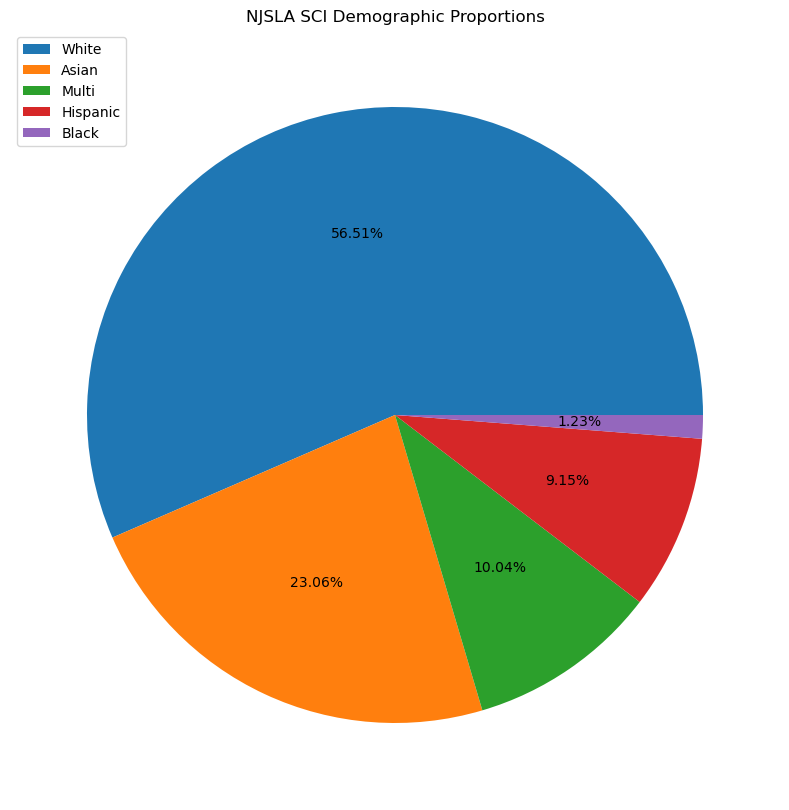

In [15]:
plt.figure(figsize = (15,10))
plt.pie(x = 'count', data = race, autopct = '%1.2f%%')
plt.legend(['White','Asian','Multi', 'Hispanic', 'Black','Native Hawaiian Or Other Pacific Islander'], loc = 'upper left')
plt.title(f"NJSLA {subject} Demographic Proportions")
plt.show()

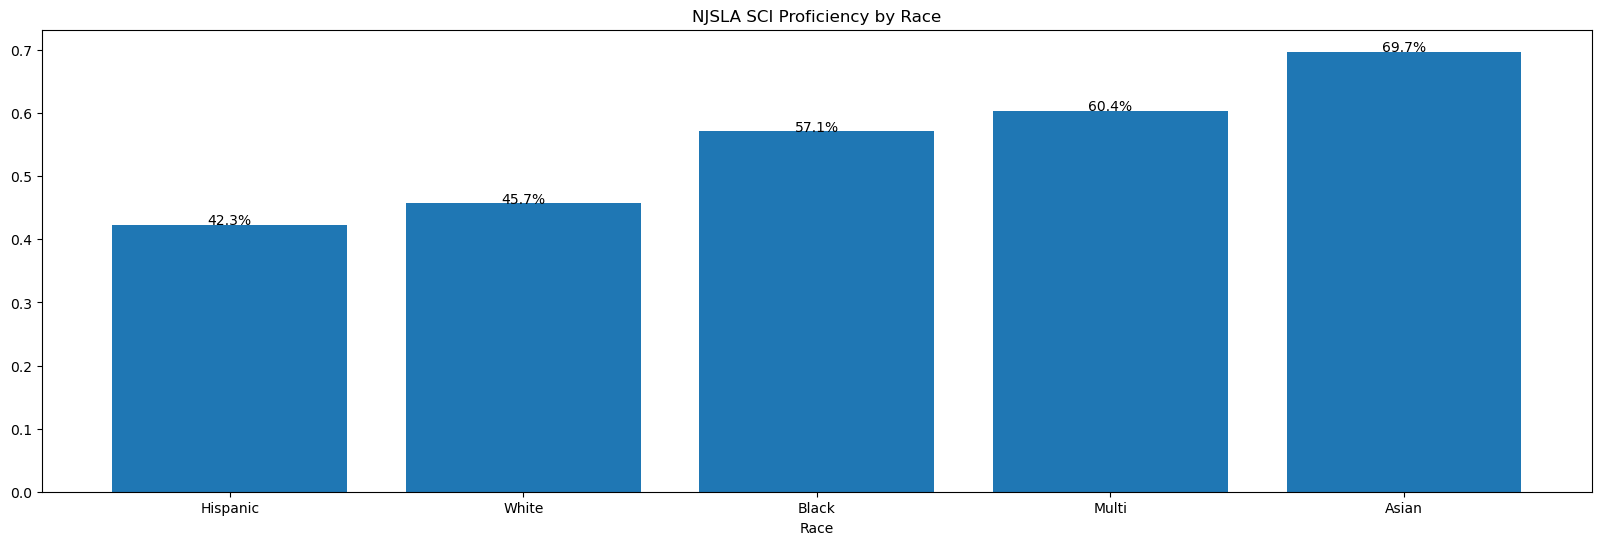

In [16]:
# proficiency by race
race_proficient = df_sci.groupby('Race')['proficient'].mean().sort_values().reset_index()

# plotting data
plt.figure(figsize = (20,6))
plt.bar(x = 'Race',height = 'proficient',data = race_proficient)

#labels
plt.title(f"NJSLA {subject} Proficiency by Race")
plt.xlabel('Race')
for i,v in enumerate(race_proficient['proficient']):
    plt.text(i,v,f"{v:.1%}", ha = 'center')

In [17]:
# stacked bar graph
race_total = df_sci['Race'].value_counts().reset_index()
race_total.rename(columns = {'count':'total'}, inplace = True)
race_not_proficient = df_sci[df_sci['proficient'] == 0]['Race'].value_counts().reset_index()
race_not_proficient.rename(columns = {'count':'not proficient count'}, inplace = True)

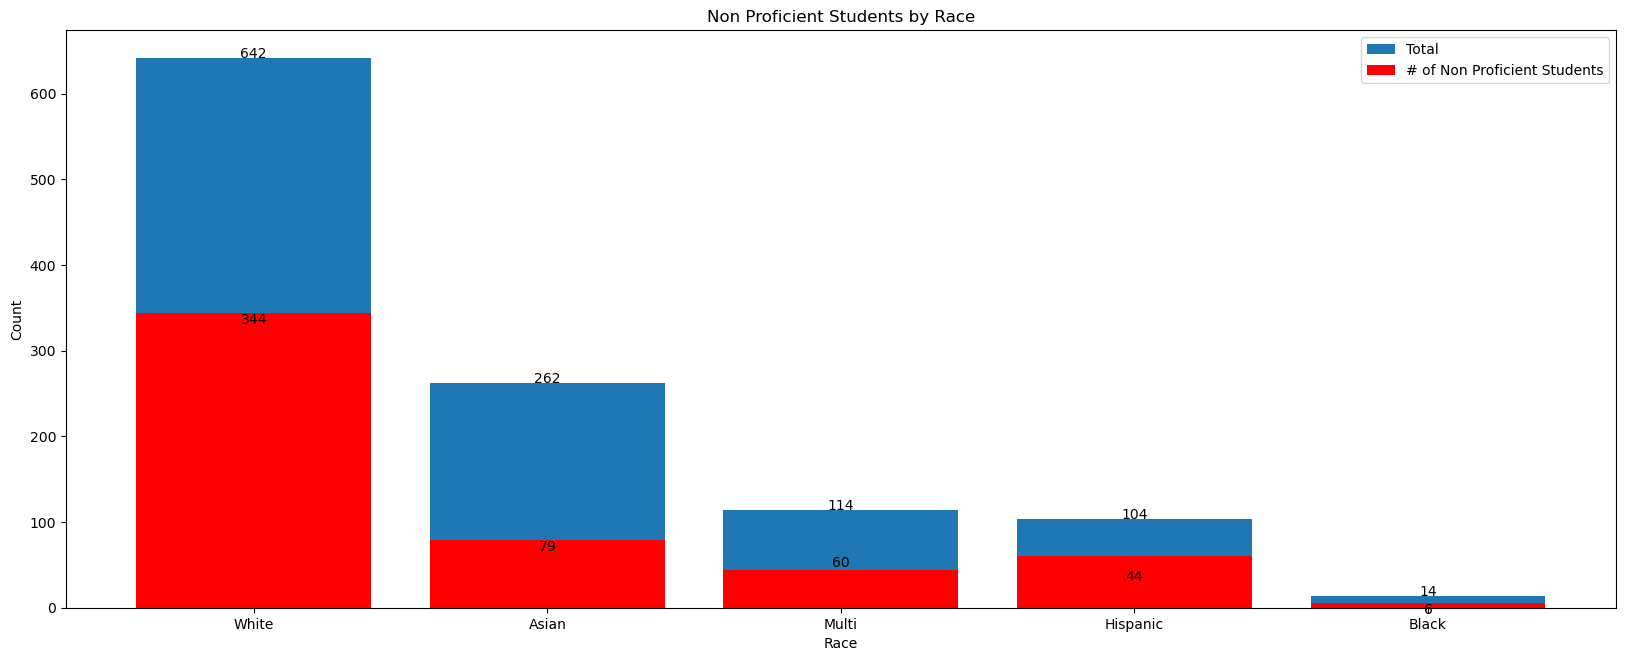

In [18]:
# plotting data
plt.figure(figsize=(20,7.5)) #--> creating a figure

#plotting data - total data and not proficient data by race
plt.bar(x = 'Race', height = 'total', data = race_total)
plt.bar(x = 'Race', height = 'not proficient count', color = 'red',data = race_not_proficient)

#adding labels to bar graphs
for i,v in enumerate(race_not_proficient['not proficient count']):#--> not proficient
    plt.text(i,v,str(v), ha = 'center', va = 'top')

for i,v in enumerate(race_total['total']): #--> total
    plt.text(i,v,f"{v:,}", ha = 'center')

# labeling plots
plt.title('Non Proficient Students by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(['Total','# of Non Proficient Students'])

# display
plt.show()

In [19]:
# data cleaning 

# creating proportions
race['%'] = race['count']/race['count'].sum()
race_not_proficient['%'] = race_not_proficient['not proficient count']/race_not_proficient['not proficient count'].sum()

# sorting data
race = race.sort_values(by = 'Race').reset_index(drop = True)
race_not_proficient = race_not_proficient.sort_values(by = 'Race').reset_index(drop = True)

In [20]:
race

,Race,count,%
0,Asian,262,0.230634
1,Black,14,0.012324
2,Hispanic,104,0.091549
3,Multi,114,0.100352
4,White,642,0.565141


In [21]:
race_not_proficient

,Race,not proficient count,%
0,Asian,79,0.148218
1,Black,6,0.011257
2,Hispanic,60,0.112570
3,Multi,44,0.082552
4,White,344,0.645403


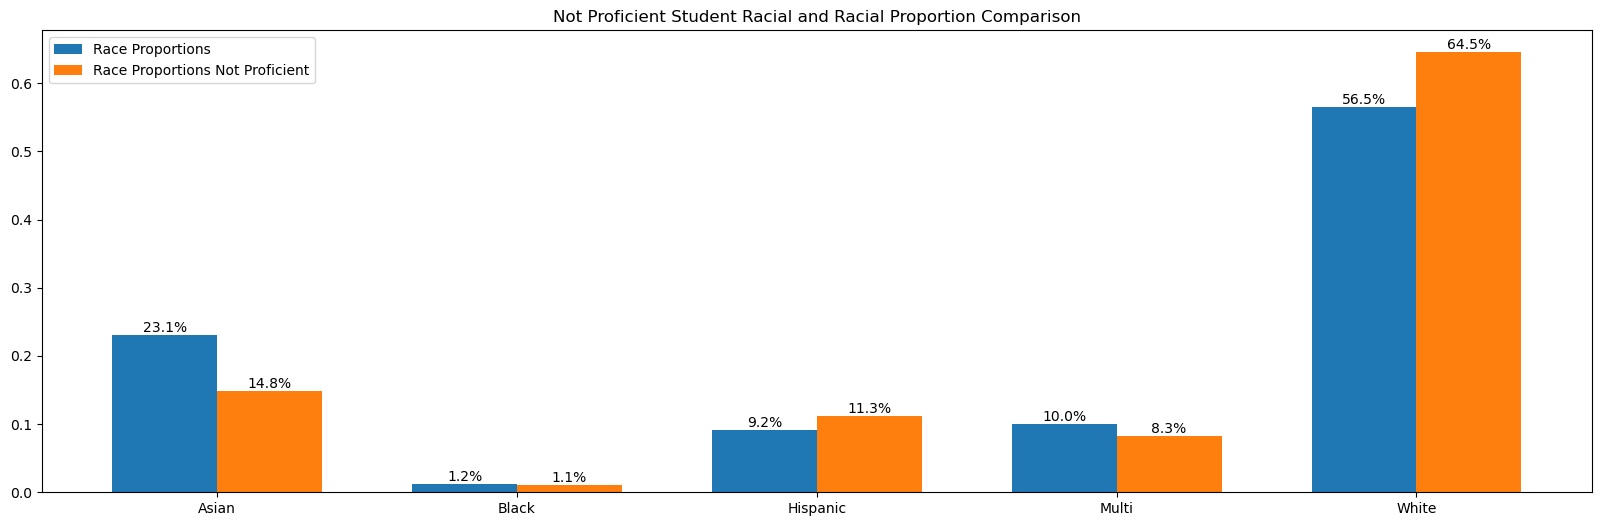

In [22]:
# creating grouped bar chart for race and proportion of r

labels = race_not_proficient['Race'].to_list() #--> labels
race_proportions = race['%'].to_list() #--> group values
race_proportions_not_proficient = race_not_proficient['%'].to_list()#--> group values

#label locations
x = np.arange(len(labels)) #--> label locations
width = 0.35 #--> width of bars

# creating subplot
fig,ax = plt.subplots(figsize = (20,6))

#plotting data
rects1 = ax.bar(x-width/2, race_proportions,width, label = 'Race Proportions')
rects2 = ax.bar(x+width/2, race_proportions_not_proficient, width, label = 'Race Proportions Not Proficient')

ax.bar_label(rects1, fmt = '{:.1%}')
ax.bar_label(rects2,fmt = '{:.1%}')

ax.set_title('Not Proficient Student Racial and Racial Proportion Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

## Test Scale Score Distribution

In [23]:
df_sci['TestScaleScore'].describe()   

count    1124.000000
mean      201.193950
std        42.008244
min       100.000000
25%       175.000000
50%       202.000000
75%       231.000000
max       300.000000
Name: TestScaleScore, dtype: float64

In [24]:
# statistical metrics
mean = df_sci['TestScaleScore'].mean()
median = df_sci['TestScaleScore'].median()
q3 = df_sci['TestScaleScore'].quantile(.75) #--> 75th percentile
q1 = df_sci['TestScaleScore'].quantile(.25) #--> 25th percentile
iqr = q3-q1 # IQR

# finding outliers
outlier_upper = q3 + (1.5 * iqr) 
outlier_lower = q1 - (1.5 * iqr)

print(f"An outlier in the for the NJSLA {subject} is a Test Scale Score greater than or equal to {outlier_upper}",
      f",or a Test Scale Score less than or equal to {outlier_lower}.",
      f"There are {df_sci[df_sci['TestScaleScore']<= outlier_lower].shape[0]} outliers in the dataset.")

An outlier in the for the NJSLA SCI is a Test Scale Score greater than or equal to 315.0 ,or a Test Scale Score less than or equal to 91.0. There are 0 outliers in the dataset.


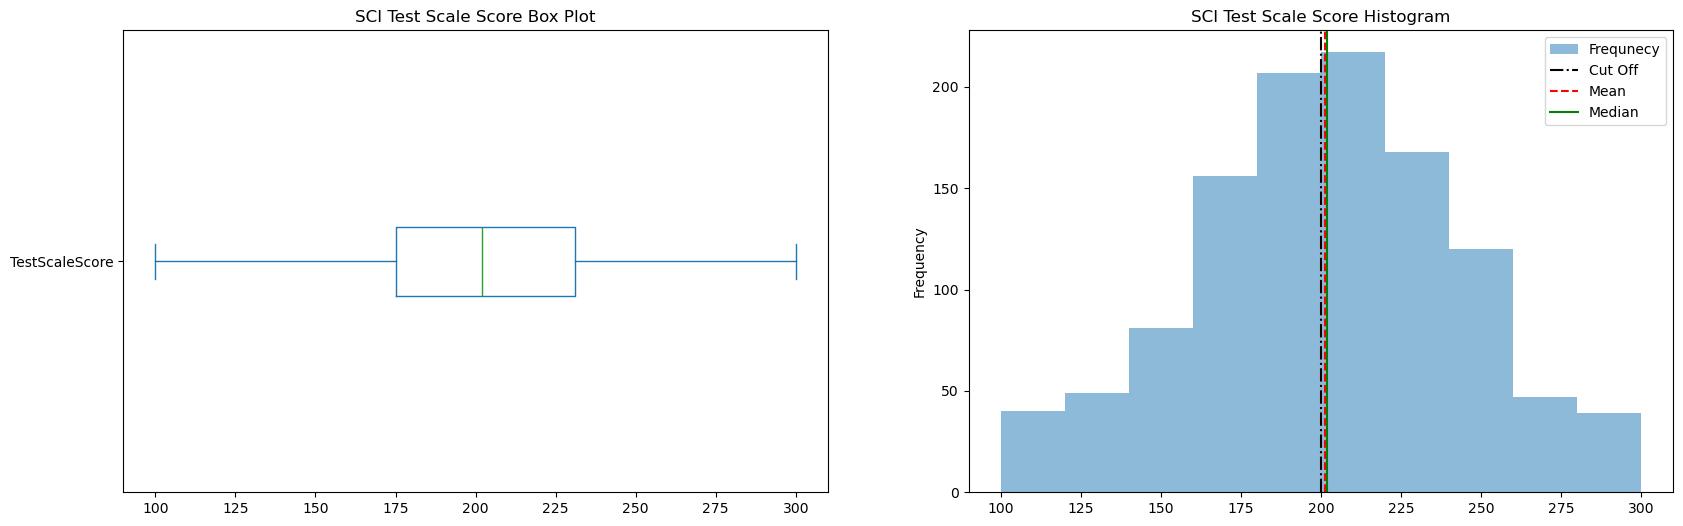

In [25]:
# plotting Test Scale Score Distribution
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

df_sci['TestScaleScore'].plot(kind = 'box', vert = False, title = f'{subject} Test Scale Score Box Plot', ax = ax[0])
df_sci['TestScaleScore'].plot(kind = 'hist', title = f'{subject} Test Scale Score Histogram', ax = ax[1], alpha = .5)

ax[1].axvline(x = 200, linestyle = '-.', color = 'black')
ax[1].axvline(x = mean, linestyle = '--', color = 'red')
ax[1].axvline(x = median, linestyle = '-', color = 'green')

plt.legend(['Frequnecy','Cut Off','Mean','Median'])

plt.show()

#### Outliers

#### Test Scale Score Distribution by Race

In [26]:
# Typical Scale Score by Race
race_test_scale_score_distribution = df_sci.groupby('Race')['TestScaleScore'].median().reset_index()
race_test_scale_score_distribution.rename(columns = {'TestScaleScore':'Median Test Scale Score'}, inplace = True)

In [27]:
race_test_scale_score_distribution

,Race,Median Test Scale Score
0,Asian,216.0
1,Black,202.0
2,Hispanic,187.0
3,Multi,213.0
4,White,193.0


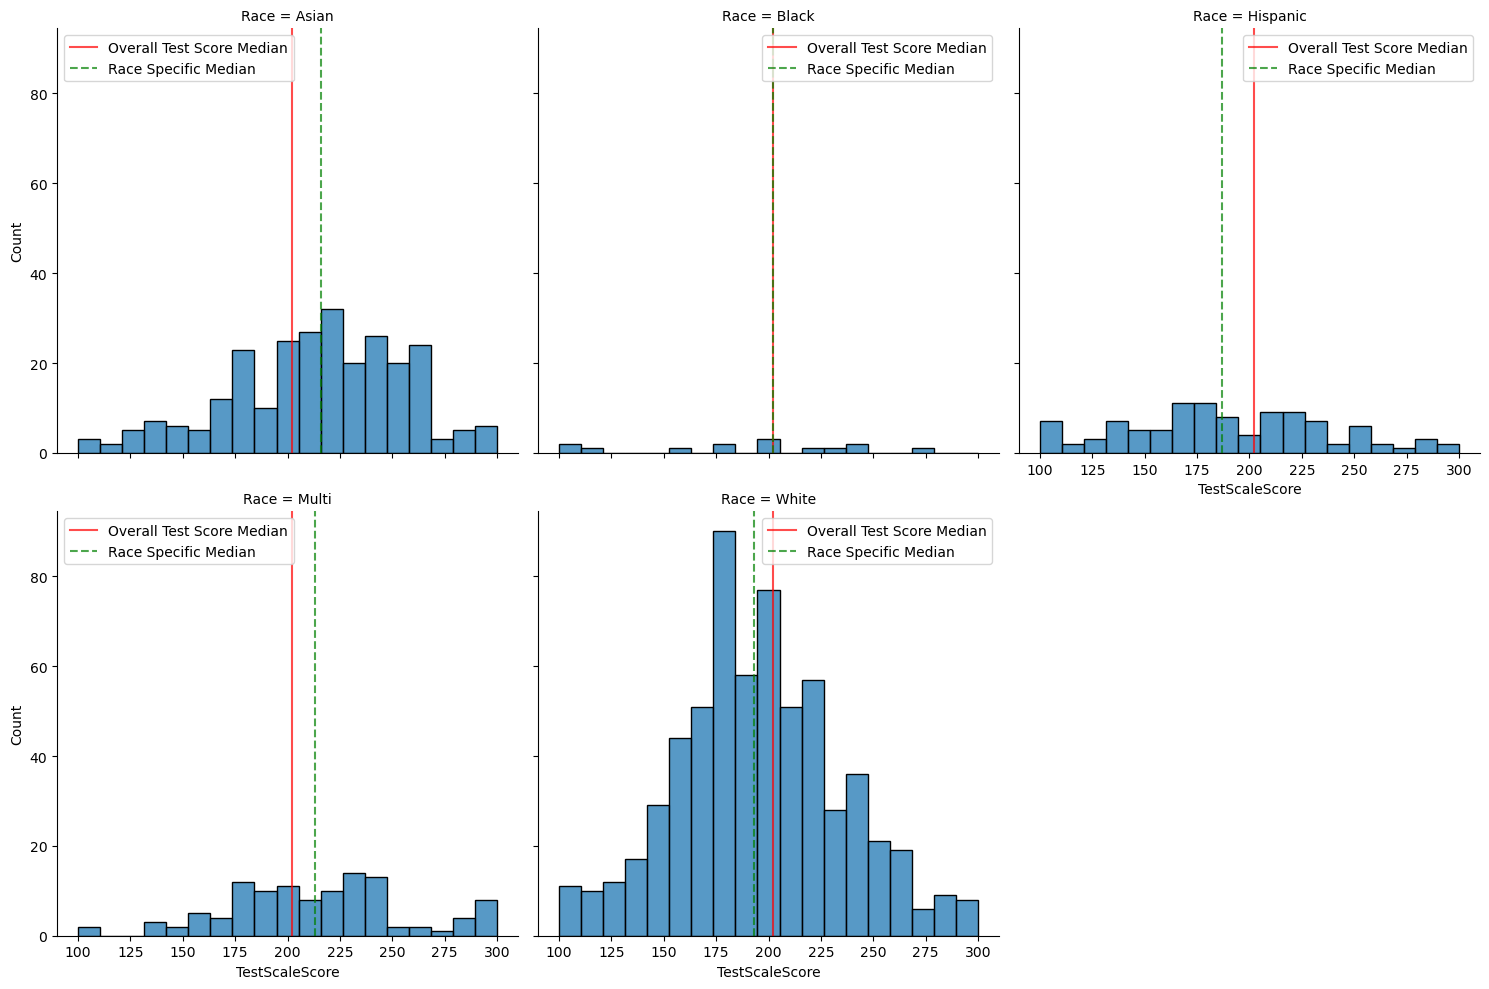

In [28]:
# Testing Scale Score Distribution by Race
df_sci = df_sci.sort_values(by = 'Race')

# creating plot object
plot = sns.displot(data = df_sci, x = 'TestScaleScore',col = 'Race',col_wrap = 3,kind = 'hist')

# creating axes object
axes = plot.axes.flatten()

# using for loop to plot median testing time line on each graph
for ax in axes:
    ax.axvline(x = median, color = 'red', label = 'Overall Test Scale Score Median', alpha = .7)

# using for loop to plot the median by racial demographic on each plot
for i,race_median in enumerate(race_test_scale_score_distribution['Median Test Scale Score']):
        axes[i].axvline(x = race_median, color = 'green', linestyle = '--',alpha = .7, label = 'Race Specific Median')

for ax in axes:
    ax.legend(['Overall Test Score Median','Race Specific Median'])


plt.show()

In [29]:
print(f"The overall median scale score in {subject} is {median}",
     f"\nThe median scale score in {subject} for {race_test_scale_score_distribution['Race'][0]} students is {race_test_scale_score_distribution['Median Test Scale Score'][0]}, a difference of {race_test_scale_score_distribution['Median Test Scale Score'][0] - median} points",
     f"\nThe median scale score in {subject} for {race_test_scale_score_distribution['Race'][1]} students is {race_test_scale_score_distribution['Median Test Scale Score'][1]}, a difference of {race_test_scale_score_distribution['Median Test Scale Score'][1] - median} points",
     f"\nThe median scale score in {subject} for {race_test_scale_score_distribution['Race'][2]} students is {race_test_scale_score_distribution['Median Test Scale Score'][2]}, a difference of {race_test_scale_score_distribution['Median Test Scale Score'][2] - median} points",
     f"\nThe median scale score in {subject} for {race_test_scale_score_distribution['Race'][3]} students is {race_test_scale_score_distribution['Median Test Scale Score'][3]}, a difference of {race_test_scale_score_distribution['Median Test Scale Score'][3] - median} points",
     f"\nThe median scale score in {subject} for {race_test_scale_score_distribution['Race'][4]} students is {race_test_scale_score_distribution['Median Test Scale Score'][4]}, a difference of {race_test_scale_score_distribution['Median Test Scale Score'][4] - median} points")

The overall median scale score in SCI is 202.0 
The median scale score in SCI for Asian students is 216.0, a difference of 14.0 points 
The median scale score in SCI for Black students is 202.0, a difference of 0.0 points 
The median scale score in SCI for Hispanic students is 187.0, a difference of -15.0 points 
The median scale score in SCI for Multi students is 213.0, a difference of 11.0 points 
The median scale score in SCI for White students is 193.0, a difference of -9.0 points


In [30]:
iep_gen_comp = df_sci[(df_sci['StudentWithDisabilities'] == 'N')|(df_sci['StudentWithDisabilities'] == 'IEP')].groupby('StudentWithDisabilities')['TestScaleScore'].median().reset_index()
iep_gen_comp.rename(columns = {'TestScaleScore':'Median Test Scale Score'}, inplace = True)
iep_gen_comp = iep_gen_comp.sort_values(by = 'Median Test Scale Score', ascending = False).reset_index(drop = True)

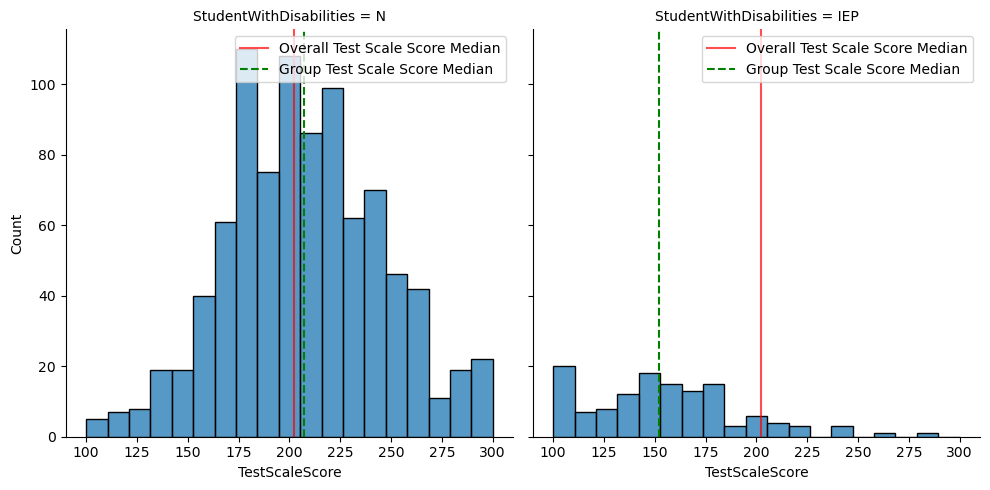

In [31]:
# Testing Scale Score Distribution by Disability

# creating plot object
plot = sns.displot(data = df_sci[(df_sci['StudentWithDisabilities'] == 'N')|(df_sci['StudentWithDisabilities'] == 'IEP')] , x = 'TestScaleScore',col = 'StudentWithDisabilities',col_wrap = 2,kind = 'hist')

# creating axes object
axes = plot.axes.flatten()

# using for loop to plot median testing time line on each graph
for ax in axes:
    ax.axvline(x = median, color = 'red', label = 'Overall Test Scale Score Median', alpha = .7)
    ax.legend()

#using for loop to plot group median in each plot
for i, group_median in enumerate(iep_gen_comp['Median Test Scale Score']):
    axes[i].axvline(x = group_median, label = 'Group Test Scale Score Median', color = 'green',linestyle = '--')

for ax in axes:
    ax.legend(['Overall Test Scale Score Median','Group Test Scale Score Median'])

plt.show()

In [32]:
print(f"The overall median scale score for {subject} is {median}",
     f"\nThe median test scale score for General Education students is {iep_gen_comp['Median Test Scale Score'][0]}, a difference of {iep_gen_comp['Median Test Scale Score'][0]-median}",
     f"\nThe median test scale score for IEP students is {iep_gen_comp['Median Test Scale Score'][1]}, a difference of {iep_gen_comp['Median Test Scale Score'][1]-median}")

The overall median scale score for SCI is 202.0 
The median test scale score for General Education students is 207.0, a difference of 5.0 
The median test scale score for IEP students is 152.0, a difference of -50.0


## Economic Disadvantage

In [33]:
eco_dis = df_sci['EconomicDisadvantageStatus'].value_counts().reset_index()

In [34]:
eco_dis

,EconomicDisadvantageStatus,count
0,N,1101
1,Y,35


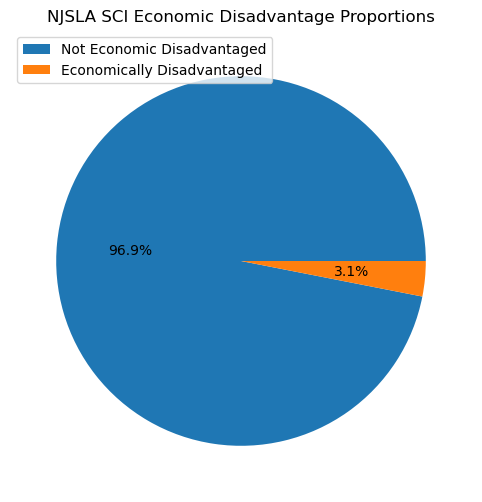

In [35]:
plt.figure(figsize = (10,6))
# plotting economic disadvantage proportion
plt.pie(x  = 'count', data = eco_dis, autopct = '%1.1f%%' )
plt.legend(['Not Economic Disadvantaged', 'Economically Disadvantaged'], loc = 'upper left')
plt.title(f'NJSLA {subject} Economic Disadvantage Proportions')
plt.show()

In [36]:
# proficiency by economic status
eco_dis_prof = df_sci.groupby('EconomicDisadvantageStatus')['proficient'].mean().reset_index()
eco_dis_prof

,EconomicDisadvantageStatus,proficient
0,N,0.534435
1,Y,0.257143


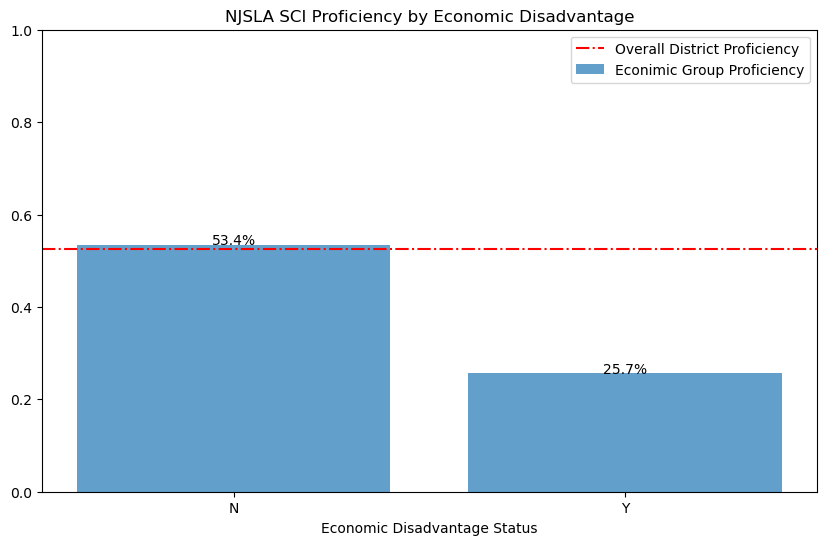

In [37]:
# creating proficiency object
ovr_prof = df_sci['proficient'].mean()

plt.figure(figsize = (10,6))

# plotting data
plt.bar(x = 'EconomicDisadvantageStatus', height = 'proficient', data = eco_dis_prof, alpha = .7)
plt.ylim(0,1)#--> setting y-axis limit

# labeling data
for i,v in enumerate(eco_dis_prof['proficient']):
    plt.text(i,v,f"{v:.1%}", ha = 'center')

plt.axhline(y = ovr_prof, color = 'red', linestyle = '-.', label = 'Overall District Proficiency')

plt.xlabel('Economic Disadvantage Status')
plt.title(f"NJSLA {subject} Proficiency by Economic Disadvantage")
plt.legend(['Overall District Proficiency','Econimic Group Proficiency'])
plt.show()

In [38]:
print(f"Students who are not economiclly disadvantaged have a proficiency rate of {eco_dis_prof['proficient'][0]:.1%} in {subject}",
     f"\nStudents who are economically disadvantaged have a proficiency rate of {eco_dis_prof['proficient'][1]:.1%} in {subject}",
     f"\nThe difference between the two groups is 27.7 percentage points",
     f"\nAdditonally, there was a { (eco_dis_prof['proficient'][0]-eco_dis_prof['proficient'][1])/eco_dis_prof['proficient'][1]:.2%} increase in proficiency when observing outcomes in NJSLA {subject} of students that are economically disadvantaged compared to students that are not economically disadvantaged")

Students who are not economiclly disadvantaged have a proficiency rate of 53.4% in SCI 
Students who are economically disadvantaged have a proficiency rate of 25.7% in SCI 
The difference between the two groups is 27.7 percentage points 
Additonally, there was a 107.84% increase in proficiency when observing outcomes in NJSLA SCI of students that are economically disadvantaged compared to students that are not economically disadvantaged


In [39]:
eco_dis_prof

,EconomicDisadvantageStatus,proficient
0,N,0.534435
1,Y,0.257143


In [40]:
df_sci[df_sci['EconomicDisadvantageStatus'] == 'Y']['Race'].value_counts()

Race
White       12
Hispanic    11
Asian        8
Black        2
Multi        2
Name: count, dtype: int64

### Economic Disadvantage Proficinecy
There is a 88% increase in proifiency rate based on economic disadvantage status, Y and N.

In [41]:
# Scale Score by Gender
eco_dis_median = df_sci.groupby('EconomicDisadvantageStatus')['TestScaleScore'].median().reset_index()
eco_dis_median.rename(columns={'TestScaleScore':'Median Test Scale Score'}, inplace = True)
eco_dis_median = eco_dis_median.sort_values(by = 'Median Test Scale Score')
eco_dis_median

,EconomicDisadvantageStatus,Median Test Scale Score
1,Y,152.0
0,N,202.0


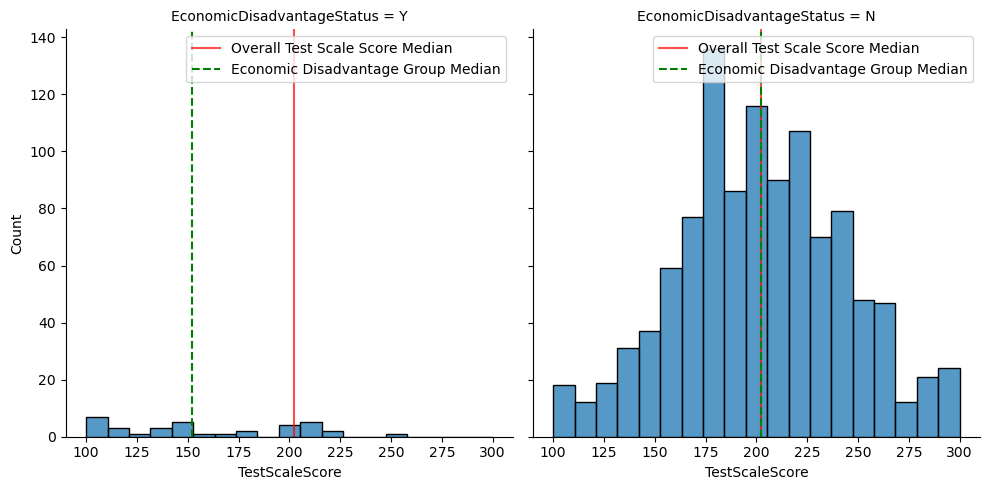

In [42]:
# Testing Scale Score Distribution by Economic Status

# creating plot object
plot = sns.displot(data = df_sci, x = 'TestScaleScore',col = 'EconomicDisadvantageStatus',kind = 'hist')

# creating axes object
axes = plot.axes.flatten()

# using for loop to plot median testing time line on each graph
for ax in axes:
    ax.axvline(x = median, color = 'red', label = 'Overall Test Scale Score Median', alpha = .7)

# using for loop to plot the test scale median for each group
for i, eco_median in enumerate(eco_dis_median['Median Test Scale Score']):
    axes[i].axvline(x = eco_median, color = 'green', linestyle = '--')

#using for loop to create legend for each plot
for ax in axes:
    ax.legend(['Overall Test Scale Score Median','Economic Disadvantage Group Median'])

plt.show()

In [43]:
print(f"The overall median scale score for {subject} is {median}",
     f"\nThe median test scale score for students that are not economically disadvantaged in {subject} is {eco_dis_median['Median Test Scale Score'][0]}, a difference of {eco_dis_median['Median Test Scale Score'][0]-median} ",
     f"\nThe median test scale score for students that are economically disadvantaged in {subject} is {eco_dis_median['Median Test Scale Score'][1]}, a difference of {eco_dis_median['Median Test Scale Score'][1]-median}")

The overall median scale score for SCI is 202.0 
The median test scale score for students that are not economically disadvantaged in SCI is 202.0, a difference of 0.0  
The median test scale score for students that are economically disadvantaged in SCI is 152.0, a difference of -50.0
